# Homework 1
### COMP9417, Machine Learning and Data Mining
<br>
</br>

### Author: Anant Krishna Mahale (z5277610)

<br>



</br>

##### 1.The $\theta$ parameters ($\theta_0$, $\theta_1$;) from step 3 when you are using house age feature.

### $\theta_0$ is 42.54078538346594
### $\theta_1$ is -10.319399022339129




##### 2. A plot, which visualises the change in cost function J($\theta$) at each iteration. 
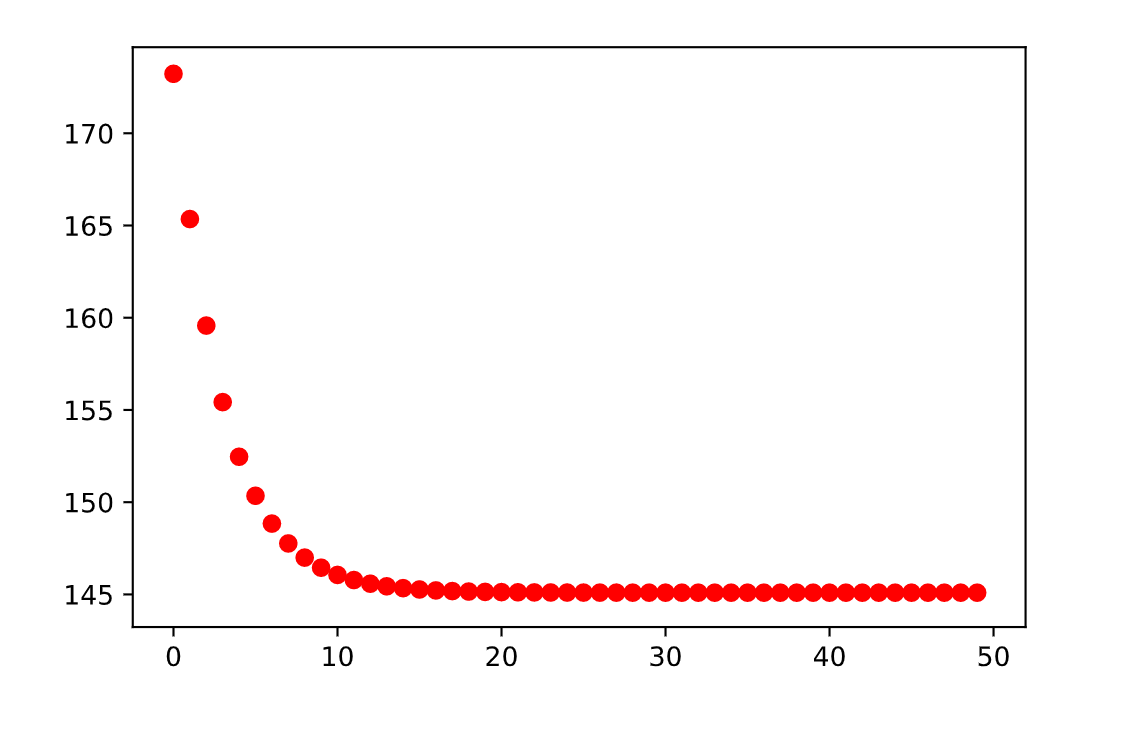





##### 3. RMSE for your training set when you use house age feature.

### RMSE for 'House_age' <em> training_data</em> 12.045510305912353

##### 4. RMSE for test set, when you use house_age feature. 

### RMSE for 'House_age' <em>testing_data</em> 16.58731450340051

##### 5. RMSE for test set, when you use distance to the station feature.

### RMSE for 'Distance_to_Stataion' <em>testing data</em> 12.652088009723935

##### 6.RMSE for test set, when you use number of stores feature

### RMSE value while using 'Number of Stores' <em> testing data</em> 14.731993508206784

##### 7.Compare the performance of your three models and rank them accordingly.

<br>



</br>


__These are the different RMSE Values obtained from different features.__

__House Age__
    * Training: 12.045510305912353
	* Testing: 16.58731450340051

__Distance to the nearest MRT station__
	* Training: 9.165754538401488
	* Testing: 12.652088009723935

__Number of convenience stores__
	* Training: 27.486676129636784
	* Testing: 25.642117651334722

	
We can see that, RMSE value for training data of “Number of convenience stores”> “House Age”> “Distance to the nearest MRT station” 

Since training RMSE value for feature “Distance to the nearest MRT station” is least amongst all and order of magnitude for test and train data is same, I would rate it 1. 

In the same terms, I would rank ‘House Age’ 2, and ‘Number of convenience stores’ 3 as it’s RMSE value is high among all the features.

<br>

</br>

__Summary of the Rank:__

1. Distance to the nearest MRT station
2. House Age
3. Number of convenience stores


In [1]:
#matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math 
from sklearn import datasets,linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
#fucntion to calculate the square
def square(x):
    return x*x


In [3]:
def stocashtic_gradient_descent(X,y,theta0, theta1,learning_rate,iterations,color):
    m = len(y)
    for i in range(iterations):
        for j in range(m):
            h_x = theta0 + theta1 * X[j]
            theta0 = theta0 + learning_rate* (y[j] - h_x)
            theta1 = theta1 + learning_rate * (y[j] - h_x) * X[j]
        lossFn = sum([square(y[k] - theta0 - theta1*X[k]) for k in range(m)])/m
        #print(lossFn)
        plt.scatter(i, lossFn, c=color)        
    return theta0, theta1


In [4]:
#Method to find the RMSE.
def findRMSE (X,y, theta0, theta1):
    m = len(y)
    sumSoFar = 0
    for i in range(m):
        currentSum = square(y[i] - theta0 - theta1 * X[i])
        sumSoFar = sumSoFar+currentSum
    sumSoFar = (1/m)*sumSoFar
    RMSE = math.sqrt(sumSoFar)

    return RMSE



In [5]:
# loading the housing_price_dataset from the current directory. 
df=pd.read_csv('house_prices.csv')

#took each feature in the list. 
features = ["house age","distance to the nearest MRT station", "number of convenience stores"]

#Normalization.
for feature in features:
    df[feature]=((df[feature]-df[feature].min())/(df[feature].max()-df[feature].min()))



In [6]:
#Splitting Training and Test Data
trainData = df.iloc[:300]
testData = df.iloc[300:]


In [7]:
#decalring all the training data_set
train_housevalue = trainData['house price of unit area'].values
train_houseage = trainData['house age'].values
train_dist_to_store = trainData['distance to the nearest MRT station'].values
train_nbrOfStores = trainData['number of convenience stores'].values


In [8]:
#decalring all the test data_set
test_housevalue = testData['house price of unit area'].values
test_houseage = testData['house age'].values
test_dist_to_store = testData['distance to the nearest MRT station'].values
test_nbrOfStores = testData['number of convenience stores'].values


--------------------------*Values obtained on House Age Feature*--------------------------

Theta_0: 42.54078538346594

Theta_1: -10.319399022339129

RMSE value for training data 12.045510305912353

RMSE value for testing data 16.58731450340051


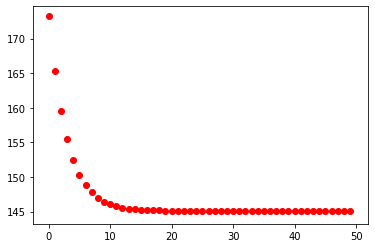

In [9]:
#intializing the parameters for training the model on House Age Values. 
#Question 1- 4
init_theta0 = -1
init_theta1 = -0.5
learningRate = 0.01
maxIteration = 50

trained_theta0_ha, trained_theta1_ha = stocashtic_gradient_descent(train_houseage,train_housevalue,init_theta0,init_theta1,learningRate,maxIteration,'red')

train_RMSE_ha = findRMSE(train_houseage, train_housevalue, trained_theta0_ha, trained_theta1_ha)
test_RMSE_ha = findRMSE(test_houseage, test_housevalue, trained_theta0_ha, trained_theta1_ha)

print('--------------------------*Values obtained on House Age Feature*--------------------------\n')

print(f'Theta_0: {trained_theta0_ha}')
print(f'\nTheta_1: {trained_theta1_ha}')      

#plt.show()

print('\nRMSE value for training data',train_RMSE_ha)
print('\nRMSE value for testing data',test_RMSE_ha)

-------------------------*Values obtained on 'Distance to the nearest MRT station Feature'*-------------------------

Theta_0: 44.766087037899375

Theta_1: -46.500633970906314

RMSE value for training data 9.165754538401488

RMSE value for testing data 12.652088009723935


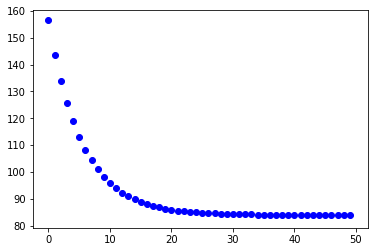

In [10]:
#Initializing the paramenters for training the model based on the distance to the station. 
#Question_5
init_theta0 = -1
init_theta1 = -0.5
learningRate = 0.01
maxIteration = 50

trained_theta0_ds, trained_theta1_ds = stocashtic_gradient_descent(train_dist_to_store,train_housevalue,init_theta0,init_theta1,learningRate,maxIteration,'blue')
#plt.show()
train_RMSE_ds = findRMSE(train_dist_to_store, train_housevalue, trained_theta0_ds, trained_theta1_ds)
test_RMSE_ds = findRMSE(test_dist_to_store, test_housevalue, trained_theta0_ds, trained_theta1_ds)

print('-------------------------*Values obtained on \'Distance to the nearest MRT station Feature\'*-------------------------\n')

print(f'Theta_0: {trained_theta0_ds}')
print(f'\nTheta_1: {trained_theta1_ds}')

print('\nRMSE value for training data',train_RMSE_ds)
print('\nRMSE value for testing data',test_RMSE_ds)

-------------------------*Values obtained on 'Number of convenience stores' Feature*-------------------------

Theta_0: 27.486676129636784

Theta_1: 25.642117651334722

RMSE value for training data 9.83487827563954

RMSE value for testing data 14.731993508206784


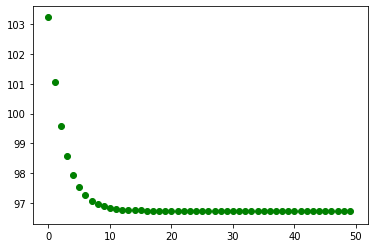

In [11]:
#Initializing the paramenters for the number of stores. 
#Question_6
init_theta0 = -1
init_theta1 = -0.5
learningRate = 0.01
maxIteration = 50

trained_theta0_ns, trained_theta1_ns = stocashtic_gradient_descent(train_nbrOfStores,train_housevalue,init_theta0,init_theta1,learningRate,maxIteration,'green')
#plt.show()
train_RMSE_ns = findRMSE(train_nbrOfStores, train_housevalue, trained_theta0_ns, trained_theta1_ns)
test_RMSE_ns = findRMSE(test_nbrOfStores, test_housevalue, trained_theta0_ns, trained_theta1_ns)

print('-------------------------*Values obtained on \'Number of convenience stores\' Feature*-------------------------\n')


print(f'Theta_0: {trained_theta0_ns}')
print(f'\nTheta_1: {trained_theta1_ns}')

print('\nRMSE value for training data',train_RMSE_ns)
print('\nRMSE value for testing data',test_RMSE_ns)

In [12]:
print('Summary:')

print('\n\n--------------------------*Values obtained on House Age Feature*--------------------------\n')

print(f'Theta_0: {trained_theta0_ha}')
print(f'\nTheta_1: {trained_theta1_ha}')      
print('\nRMSE value for training data',train_RMSE_ha)
print('\nRMSE value for testing data',test_RMSE_ha)

print('\n\n-------------------------*Values obtained on \'Distance to the nearest MRT station Feature\'*-------------------------\n')

print(f'Theta_0: {trained_theta0_ds}')
print(f'\nTheta_1: {trained_theta1_ds}')
print('\nRMSE value for training data',train_RMSE_ds)
print('\nRMSE value for testing data',test_RMSE_ds)

print('\n\n-------------------------*Values obtained on \'Number of convenience stores\' Feature*-------------------------\n')


print(f'Theta_0: {trained_theta0_ns}')
print(f'\nTheta_1: {trained_theta1_ns}')
print('\nRMSE value for training data',train_RMSE_ns)
print('\nRMSE value for testing data',test_RMSE_ns)


Summary:


--------------------------*Values obtained on House Age Feature*--------------------------

Theta_0: 42.54078538346594

Theta_1: -10.319399022339129

RMSE value for training data 12.045510305912353

RMSE value for testing data 16.58731450340051


-------------------------*Values obtained on 'Distance to the nearest MRT station Feature'*-------------------------

Theta_0: 44.766087037899375

Theta_1: -46.500633970906314

RMSE value for training data 9.165754538401488

RMSE value for testing data 12.652088009723935


-------------------------*Values obtained on 'Number of convenience stores' Feature*-------------------------

Theta_0: 27.486676129636784

Theta_1: 25.642117651334722

RMSE value for training data 9.83487827563954

RMSE value for testing data 14.731993508206784


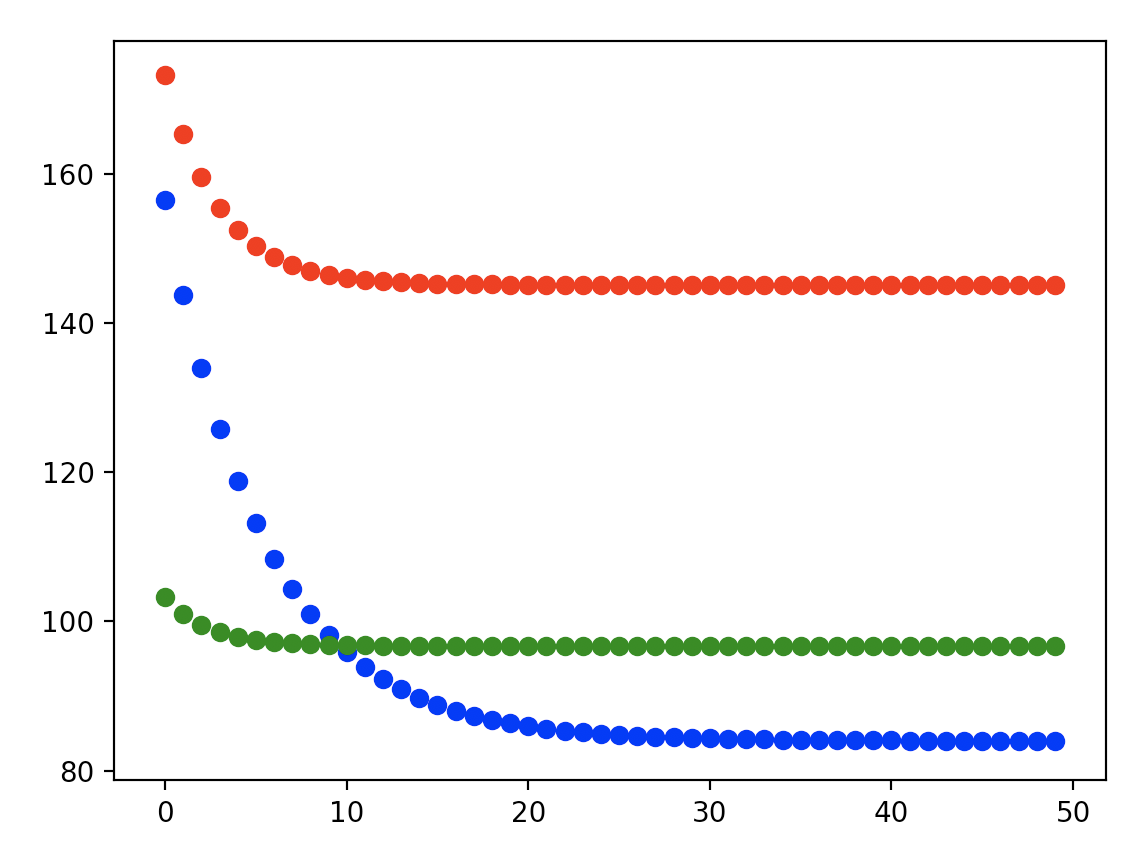
